# Data Visualization

### Set up the notebook
There are a few lines of code that you'll need to run at the top of every notebook to set up your coding environment. It's not important to understand these lines of code now, and so we won't go into the details just yet. (Notice that it returns as output: Setup Complete.)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Line Charts

In [2]:
# Path of the file to read
spotify_filepath = "data/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Daily Global Streams of Popular Songs in 2017-2018'}, xlabel='Date'>

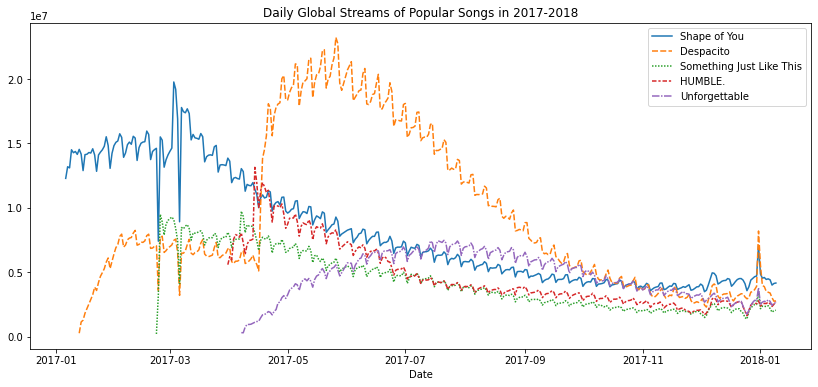

In [3]:
# Set the width to 14 inches and height 6 inches to the figure 
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing how FIFA rankings evolved over time 
# The output is well formated as time because index col type is Date
sns.lineplot(data=spotify_data)

### Plot a subset of the data
So far, you've learned how to plot a line for every column in the dataset. In this section, you'll learn how to plot a subset of the columns.

We'll begin by printing the names of all columns. This is done with one line of code and can be adapted for any dataset by just swapping out the name of the dataset (in this case, spotify_data).

In [4]:
list(spotify_data.columns)

['Shape of You',
 'Despacito',
 'Something Just Like This',
 'HUMBLE.',
 'Unforgettable']

In the next code cell, we plot the lines corresponding to the first two columns in the dataset.

Text(0.5, 0, 'Date')

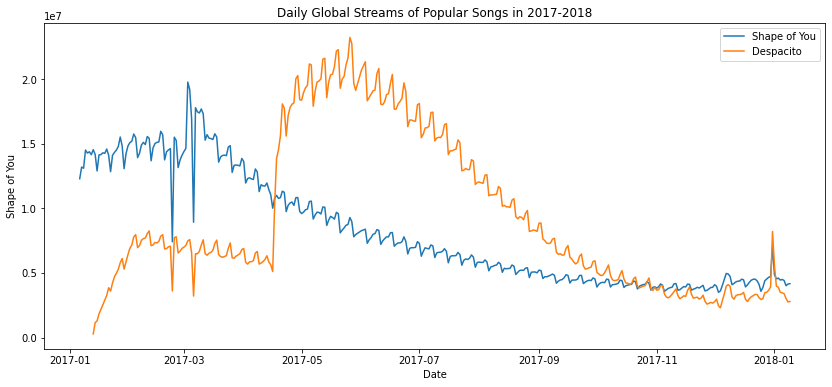

In [5]:
# Set the width to 14 inches and height 6 inches to the figure 
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date")

## Bar Charts

In [6]:
# Path of the file to read
flight_filepath = "data/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

flight_data.head()

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


You may notice that the code is slightly shorter than what we used in the previous tutorial. In this case, since the row labels (from the 'Month' column) don't correspond to dates, we don't add parse_dates=True in the parentheses.

Say we'd like to create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

Text(0, 0.5, 'Arrival delay (in minutes)')

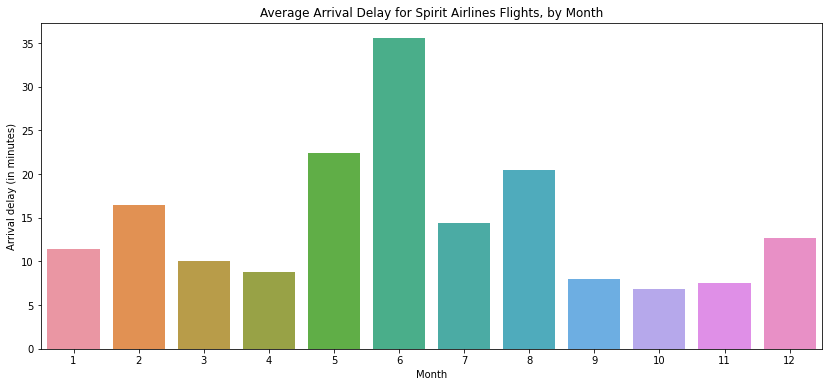

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

`x=flight_data.index` - This determines what to use on the horizontal axis. In this case, we have selected the column that indexes the rows (in this case, the column containing the months).

`y=flight_data['NK']` - This sets the column in the data that will be used to determine the height of each bar. In this case, we select the 'NK' column.

**Important Note:** You must select the indexing column with flight_data.index, and it is not possible to use flight_data['Month'] (which will return an error). This is because when we loaded the dataset, the "Month" column was used to index the rows. We always have to use this special notation to select the indexing column.

## Heatmap

We have one more plot type to learn about: heatmaps!

In the code cell below, we create a heatmap to quickly visualize patterns in flight_data. Each cell is color-coded according to its corresponding value.

Text(0.5, 33.0, 'Airline')

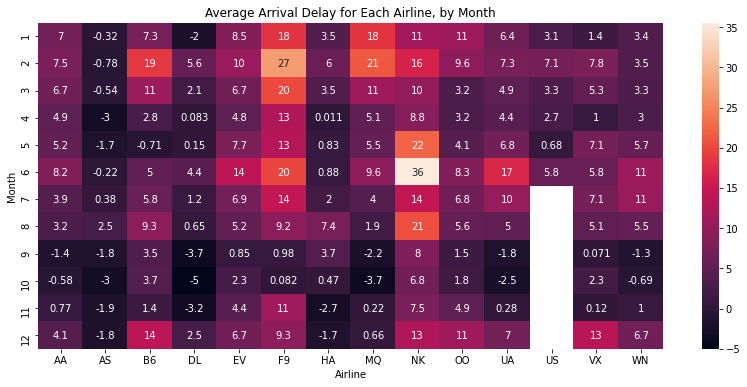

In [8]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

`annot=True` - This ensures that the values for each cell appear on the chart. (Leaving this out removes the numbers from each of the cells!)

What patterns can you detect in the table? For instance, if you look closely, the months toward the end of the year (especially months 9-11) appear relatively dark for all airlines. This suggests that airlines are better (on average) at keeping schedule during these months!

## Scatter Plot

In [9]:
# Path of the file to read
insurance_filepath = "data/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To create a simple scatter plot, we use the `sns.scatterplot` command and specify the values for:

  - the horizontal x-axis (`x=insurance_data['bmi']`)
  - the vertical y-axis (`y=insurance_data['charges']`)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

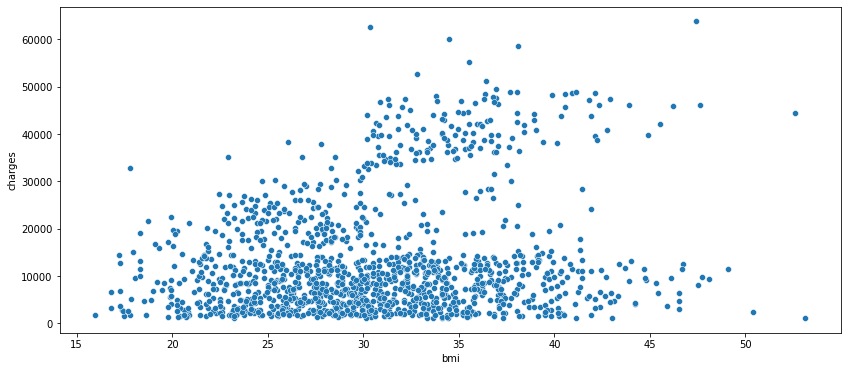

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to `sns.regplot`.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

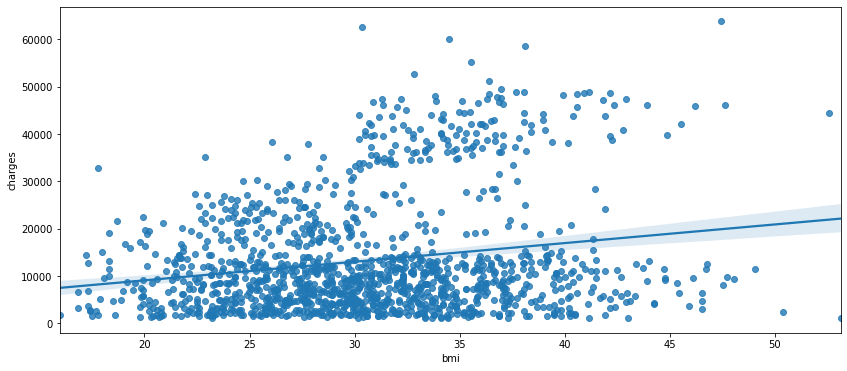

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

### Color-coded scatter plots
We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

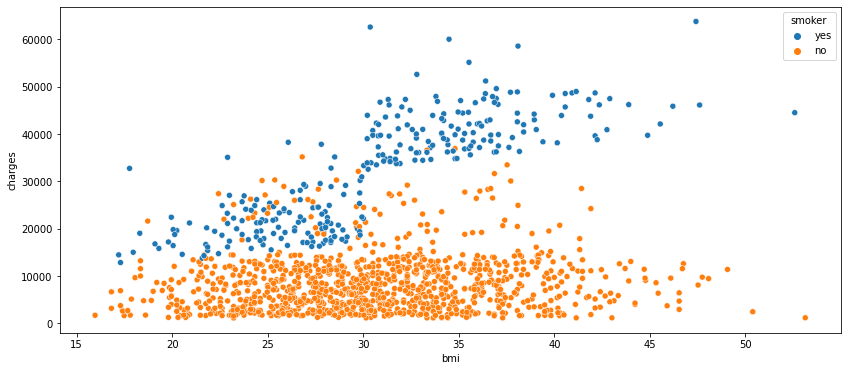

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

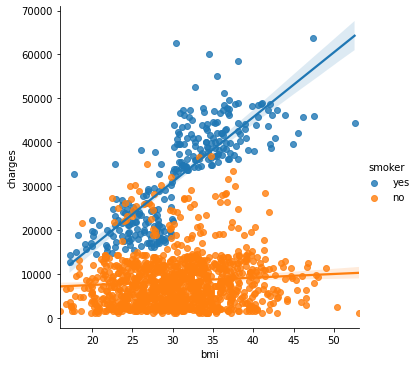

In [13]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

The `sns.lmplot` command above works slightly differently than the commands you have learned about so far:
`
 - Instead of setting `x=insurance_data['bmi']` to select the `'bmi'` column in insurance_data, we set `x="bmi"` to specify the name of the column only.
 - Similarly, `y="charges"` and `hue="smoker"` also contain the names of columns.
 - We specify the dataset with data=insurance_data.


Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

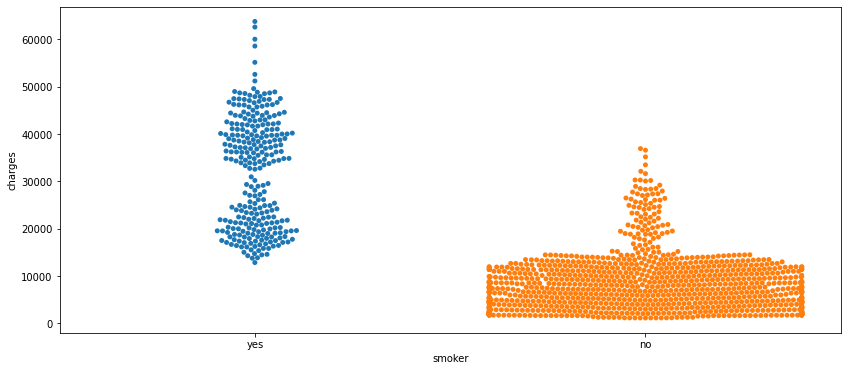

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])

## Distributions

In [15]:
# Path of the file to read
iris_filepath = "data/iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Histograms
Say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the sns.distplot command.

<AxesSubplot:xlabel='Petal Length (cm)'>

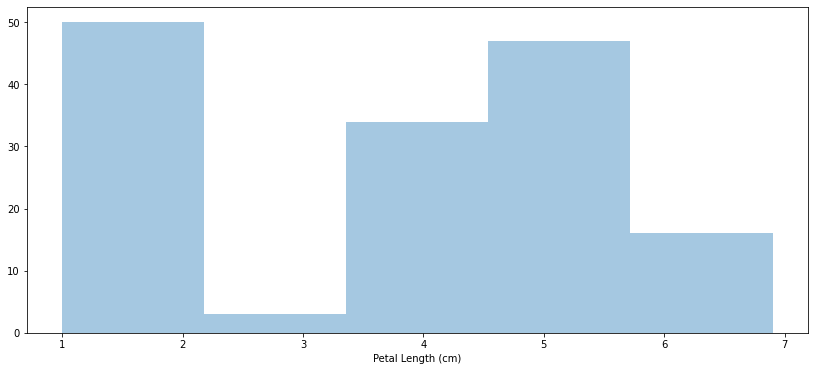

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)

We customize the behavior of the command with two additional pieces of information:

  - a = chooses the column we'd like to plot (in this case, we chose 'Petal Length (cm)').
  - kde = False is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.

### Density plots
The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve (and data= has identical functionality as when we made the histogram above).

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Density'>

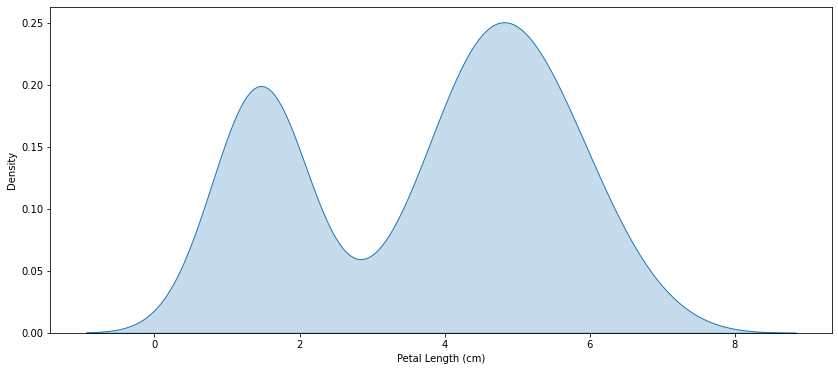

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

## 2D KDE plots
We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the sns.jointplot command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.

<Figure size 1008x432 with 0 Axes>

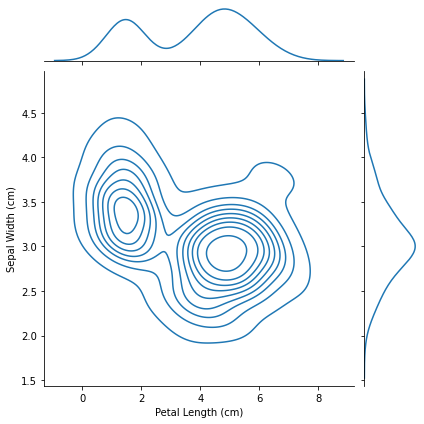

In [18]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

Note that in addition to the 2D KDE plot in the center,

  - The curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, `iris_data['Petal Length (cm)']`)
  - The curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, `iris_data['Sepal Width (cm)']`)

### Color-coded plots
For the next part of the tutorial, we'll create plots to understand differences between the species. To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.

In [19]:
# Paths of the files to read
iris_set_filepath = "data/iris_setosa.csv"
iris_ver_filepath = "data/iris_versicolor.csv"
iris_vir_filepath = "data/iris_virginica.csv"

# Read the files into variables 
iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

# Print the first 5 rows of the Iris versicolor data
iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In the code cell below, we create a different histogram for each species by using the sns.distplot command (as above) three times. We use label= to set how each histogram will appear in the legend.

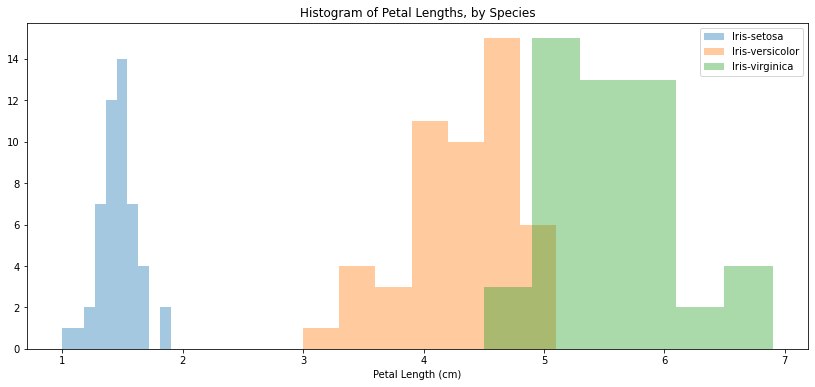

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Histograms for each species
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

In this case, the legend does not automatically appear on the plot. To force it to show (for any plot type), we can always use plt.legend().

We can also create a KDE plot for each species by using sns.kdeplot (as above). Again, label= is used to set the values in the legend.

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

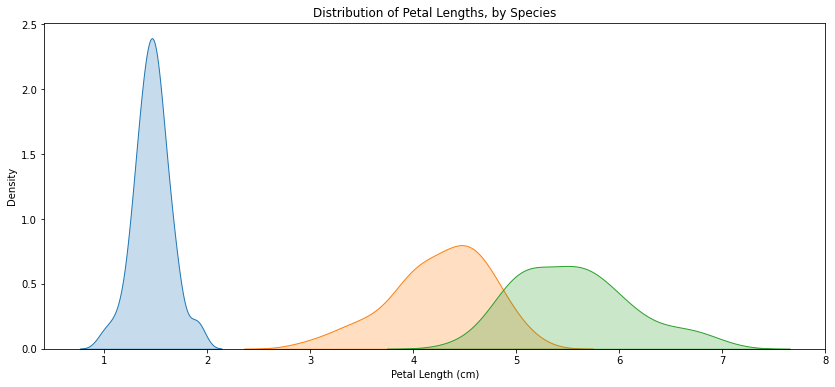

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# KDE plots for each species
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

## Multiple Plots

<AxesSubplot:title={'center':'Distribution of Petal Lengths, by Species'}, xlabel='Petal Length (cm)', ylabel='Density'>

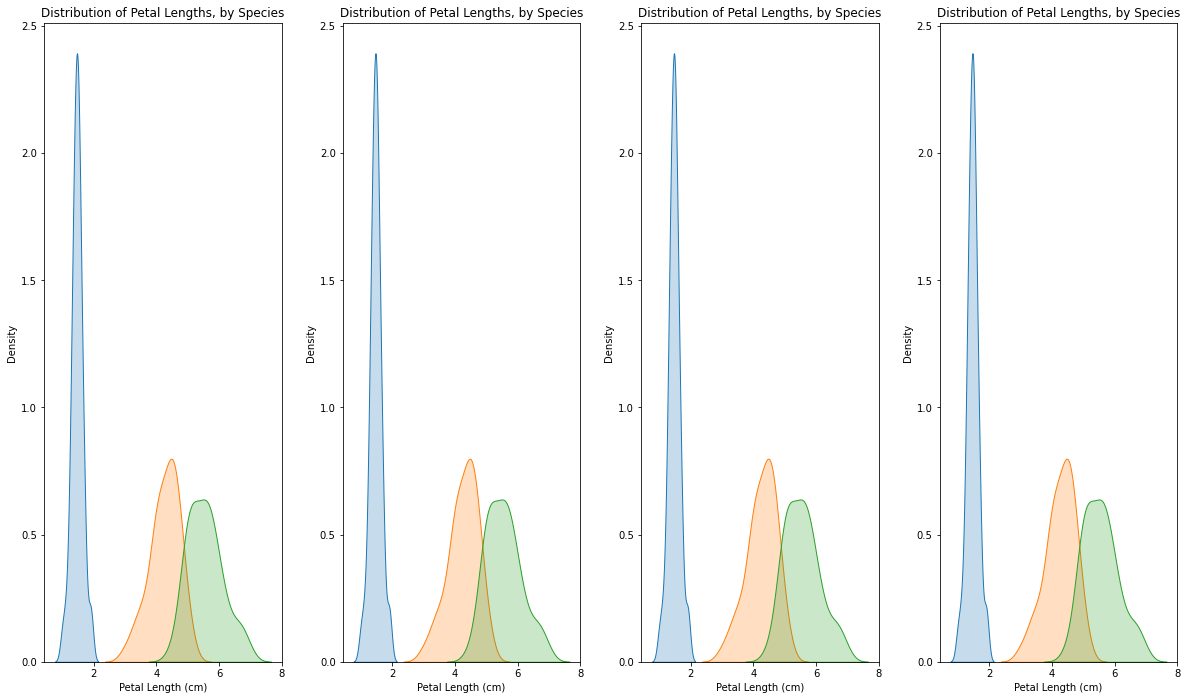

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17, 10))
fig.tight_layout(pad=3)  # Set spacing between plots

ax1.set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax1)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax1)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax1)

ax2.set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax2)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax2)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax2)

ax3.set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax3)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax3)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax3)

ax4.set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax4)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax4)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax4)

<AxesSubplot:title={'center':'Distribution of Petal Lengths, by Species'}, xlabel='Petal Length (cm)', ylabel='Density'>

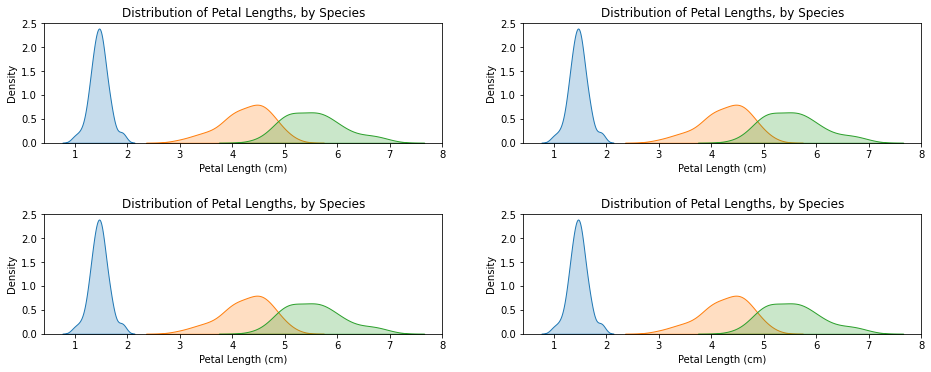

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14, 6))
fig.tight_layout(pad=5.0)  # Set spacing between plots

ax1[0].set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax1[0])
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax1[0])
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax1[0])

ax1[1].set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax1[1])
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax1[1])
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax1[1])

ax2[0].set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax2[0])
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax2[0])
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax2[0])

ax2[1].set_title("Distribution of Petal Lengths, by Species")
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True, ax=ax2[1])
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True, ax=ax2[1])
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True, ax=ax2[1])